## Libraries importation

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from pprint import pprint

## Lecture of file

In [265]:
train_data = pd.read_csv("train.csv", usecols = lambda x: x != "PassengerId")
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Feature Engineering/Exploratory Analysis

### Ticket

In [266]:
print(train_data["Ticket"].unique()[0:30])

"""
It can be seen that the structure of the entire strings is that (in some cases) it appears text with numbers 
(Iy may not be the case tough) and then an space and numbers (This is for sure) then we could proceed to create a columns with that 
first substring of the entire string and then the numbers
"""

def getLeftSubstring(row):
    if len(row.split()) == 1 and not (row == "LINE"):
        return np.nan
    elif len(row.split()) == 3:
        return row.split()[0] + row.split()[1]
    elif row == "LINE":
        return row
    else:
        return row.split()[0]

def getRightSubstring(row):
    if len(row.split()) == 1 and not (row == "LINE"):
        return row
    elif len(row.split()) == 3:
        return row.split()[2]
    elif row == "LINE":
        return "0"
    else:
        return row.split()[1]
    
train_data["Ticket_Left_Substring"] = train_data["Ticket"].apply(getLeftSubstring)
train_data["Ticket_Right_Substring"] = train_data["Ticket"].apply(getRightSubstring)

# A conversion is made based on what it should be by looking at the strings (integer)

train_data["Ticket_Right_Substring"] = train_data["Ticket_Right_Substring"].astype(int)

train_data

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Left_Substring,Ticket_Right_Substring
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,211536
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,112053
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,W./C.,6607
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,111369


### Name

In [267]:
print(train_data["Name"].unique()[0:10]) # It can be seen that after the commas it appears the nicknames of the persons

train_data["Nickname"] = train_data["Name"].str.extract(", ([a-zA-Z\s]*)\. ")
print(train_data["Nickname"].isnull().sum()) # There are not null values
print(train_data["Nickname"].unique()) #There are the nicknames

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
0
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [268]:
# Deleting columns who were modified

train_data.drop(columns = ["Name", "Ticket"], inplace = True)

## Feature Selection

In [269]:
# Check for number of null values in each feature in dataframe
train_data.isnull().sum()

Survived                    0
Pclass                      0
Sex                         0
Age                       177
SibSp                       0
Parch                       0
Fare                        0
Cabin                     687
Embarked                    2
Ticket_Left_Substring     661
Ticket_Right_Substring      0
Nickname                    0
dtype: int64

In [270]:
# Deletion of Cabin and Ticket_Left_Substring due to the big amount of null values. On the other hand Sex column doesn't have too much missing values

train_data.drop(columns = ["Ticket_Left_Substring", "Cabin"], inplace = True)
train_data.dropna(subset="Embarked", inplace = True)

# Inferential analysis

### Categorical Variables

Measure of relationship with dependent variable (Survived)

In [271]:
categorical = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Nickname"]
p_values_list = []

for category in categorical:
    table = pd.crosstab(train_data["Survived"], train_data[category],  margins = True)
    stat, p, dof, expected = chi2_contingency(table)
    p_values_list.append(p)

dictionary = sorted(dict(zip(categorical, p_values_list)).items(), key=lambda item: item[1])
pprint(dictionary)

# All of them are important variables, they are order from the most important to the lowest

[('Sex', 3.1333068768791997e-55),
 ('Nickname', 6.776020725468331e-44),
 ('Pclass', 1.5666290420363858e-19),
 ('Embarked', 0.00018045058101554096),
 ('SibSp', 0.0005691568934589347),
 ('Parch', 0.01258237144958331)]


It can be seen in the countplots that there is imbalanced data in some features

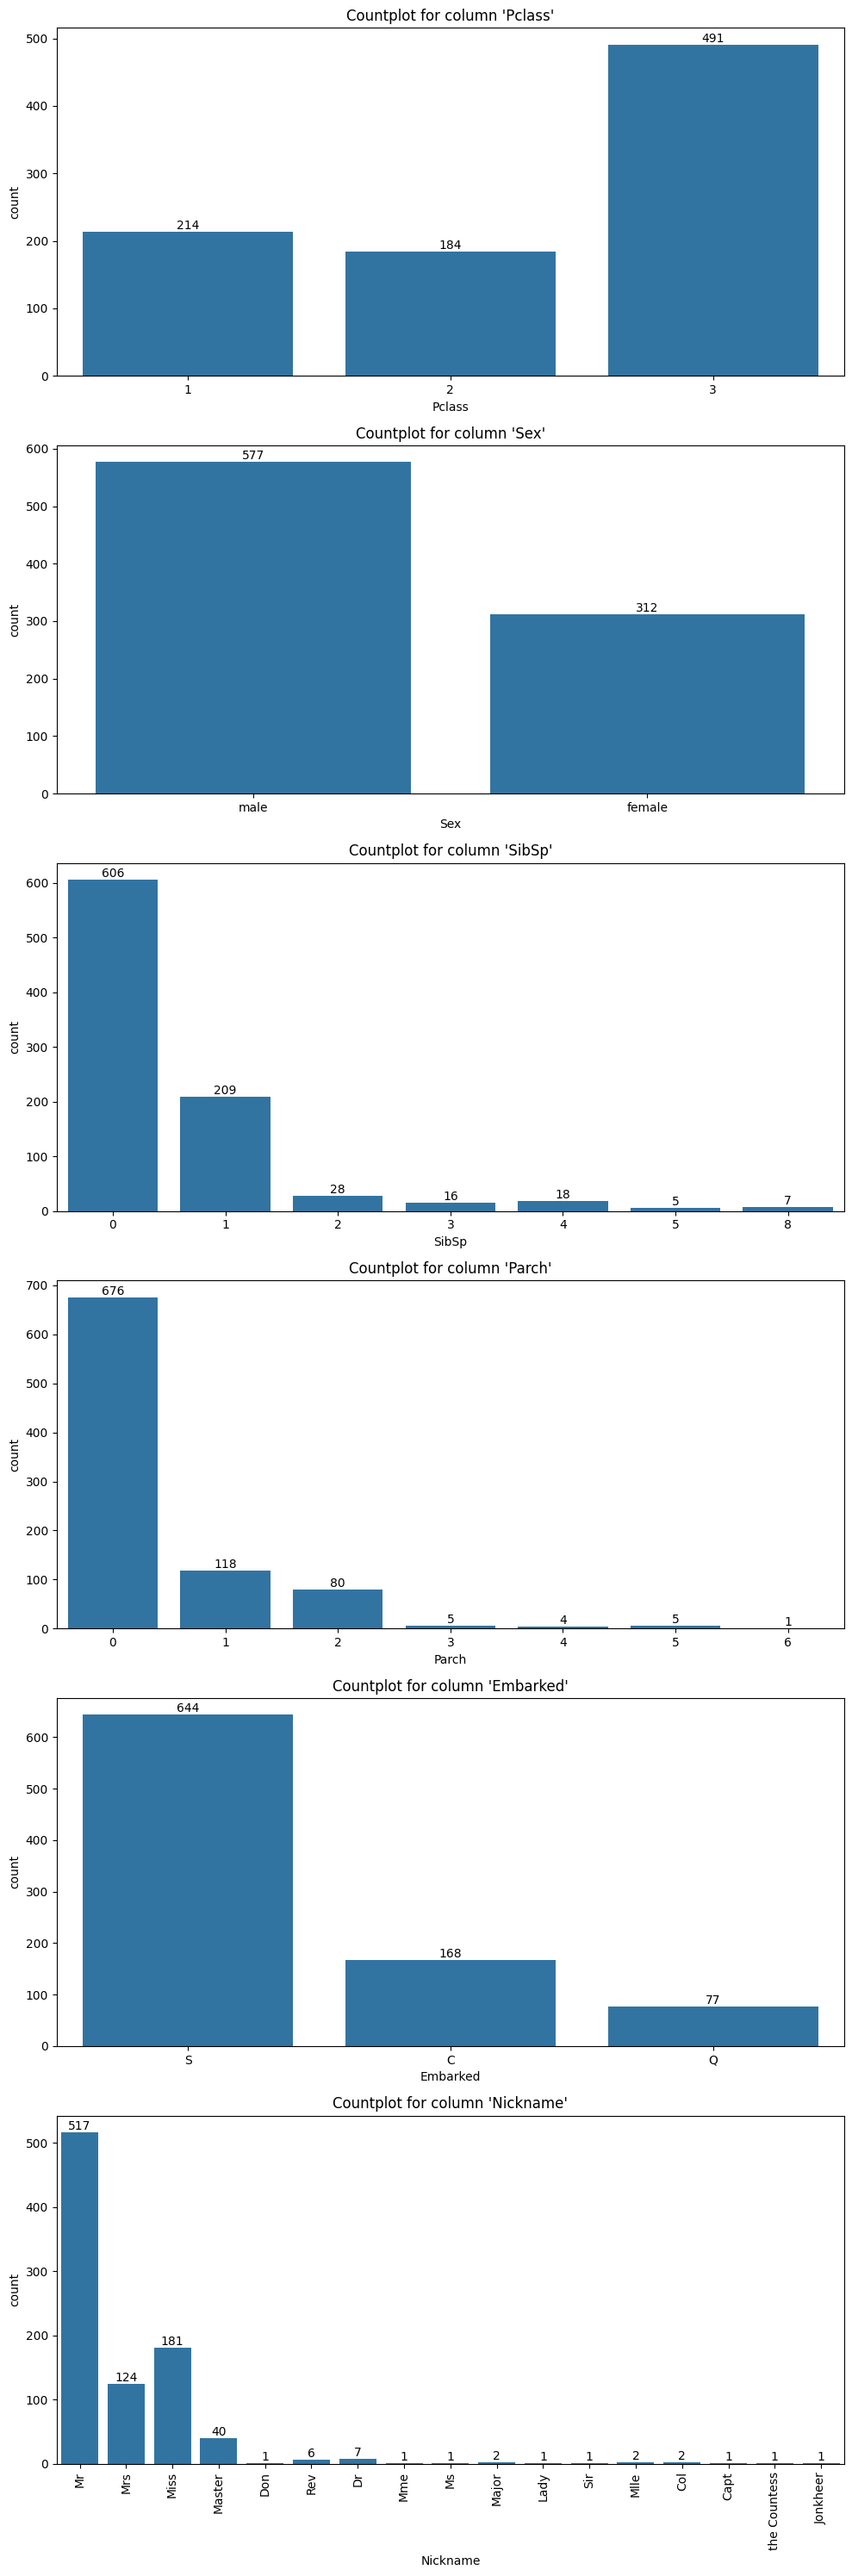

In [272]:
fig, axs = plt.subplots(6, 1, figsize=(10, 30))

for i, category in enumerate(categorical):
    if category == "Nickname":
        plt.xticks(rotation = "vertical")
    axis = sns.countplot(train_data, x = category, ax = axs[i])
    axis.bar_label(axis.containers[0])
    axis.set_title(f"Countplot for column '{category}'")

plt.tight_layout()
plt.show()

### Continuos Variables

### Pairplot with distributions based on the label of the categories in survived feature

It can be seen that in age there is simmetry in distribution when we are only having in mind data from survivors, on the other hand there is skewness when the label is for the no survivors. This means that we could impute the missing data based in this pattern in order to keep it and identify clearly which number could be in a certain distribution from both seen below.

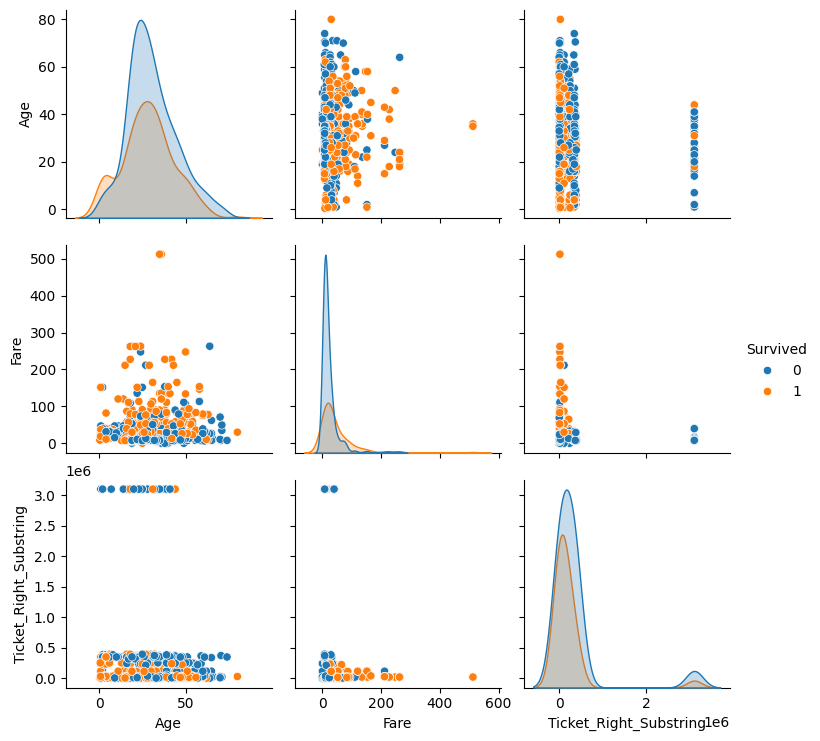

In [273]:
continuos = ["Survived", "Age", "Fare", "Ticket_Right_Substring"]

continuos_table = train_data[continuos]
sns.pairplot(data = continuos_table, hue="Survived")
plt.show()

### Individual distributions

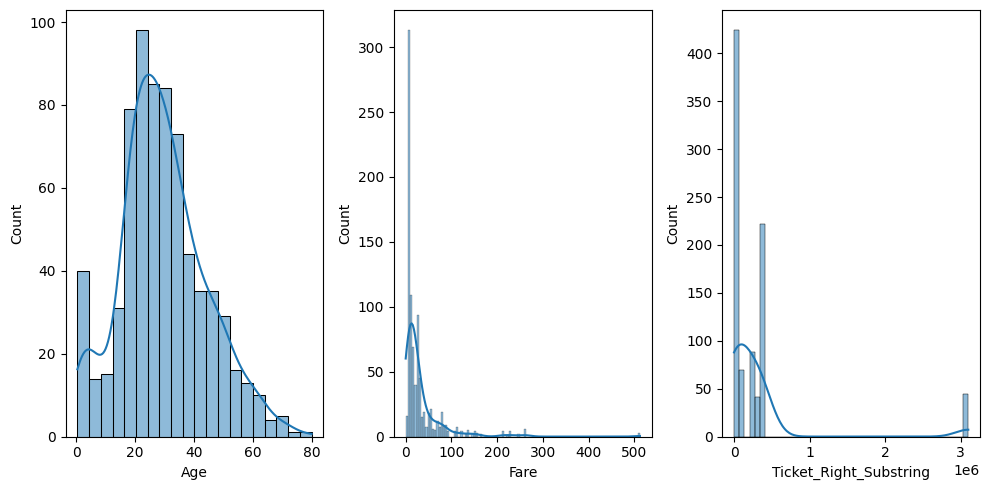

In [274]:
fig, axs = plt.subplots(1,3, figsize=(10, 5))

for i in range(len(continuos)-1):
    sns.histplot(data = continuos_table[continuos[i+1]], kde = True, ax = axs[i])

plt.tight_layout()

## Data Imputation for Age feature

The mode is going to be used for the non survivors distribution (label 0 in survived feature), this will allow me to keep the skewness and distinguish this pattern from the other distribution with the survivors label that has symmetry. This is going to be an aid because it could help the models to find this noticeable pattern.

In [275]:
Survived_groups = continuos_table.groupby("Survived")
Survivors = Survived_groups.get_group(1)["Age"]
NoSurvivors = Survived_groups.get_group(0)["Age"]
print(NoSurvivors.isnull().sum() + Survivors.isnull().sum()) # This checks that in effect the sum of null values in the groups is the expected (177)

177


In [276]:
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# First I reshape in 2D data so that imputer can detect it and then convert it back to 1D
Survivors.values[:] = imp_mean.fit_transform(Survivors.values.reshape(-1,1)).reshape(-1)
NoSurvivors.values[:] = imp_mode.fit_transform(NoSurvivors.values.reshape(-1,1)).reshape(-1) 

Result

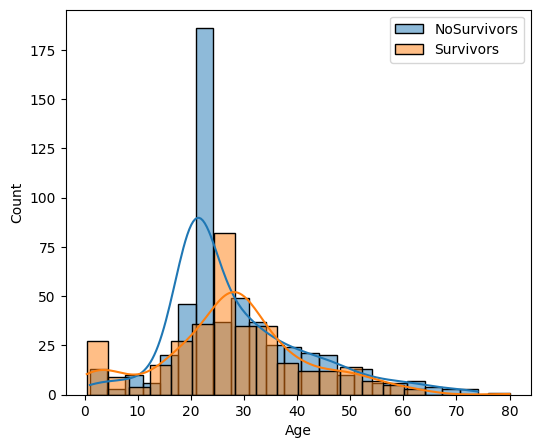

In [277]:
plt.figure(figsize=(6, 5))
sns.histplot(data = NoSurvivors, kde = True, label="NoSurvivors")
sns.histplot(data = Survivors, kde = True, label="Survivors")
plt.legend()
plt.show()

Copy of the original dataframe to create a dataframe withouth the null values

In [278]:
train_data2 = train_data.copy()
train_data2.dropna(subset="Age", axis = 0, ignore_index = True, inplace=True)
print(len(train_data2))
train_data2.isnull().sum()

712


Survived                  0
Pclass                    0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Fare                      0
Embarked                  0
Ticket_Right_Substring    0
Nickname                  0
dtype: int64

Put the imputation in original dataframe

In [279]:
train_data.loc[Survivors.index.values, "Age"] = Survivors.values
train_data.loc[NoSurvivors.index.values, "Age"] = NoSurvivors.values

## Encoder for categorical variables

In [280]:
train_data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_Right_Substring,Nickname
0,0,3,male,22.0,1,0,7.2500,S,21171,Mr
1,1,1,female,38.0,1,0,71.2833,C,17599,Mrs
2,1,3,female,26.0,0,0,7.9250,S,3101282,Miss
3,1,1,female,35.0,1,0,53.1000,S,113803,Mrs
4,0,3,male,35.0,0,0,8.0500,S,373450,Mr
...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,382652,Mrs
708,0,2,male,27.0,0,0,13.0000,S,211536,Rev
709,1,1,female,19.0,0,0,30.0000,S,112053,Miss
710,1,1,male,26.0,0,0,30.0000,C,111369,Mr


In [281]:
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = train_data2.drop(columns = ["Survived"])
Y = train_data2["Survived"]

# This column transformer sparse data
 
transformer1 = ColumnTransformer(
    [
        ("categorical", OneHotEncoder(handle_unknown='ignore', sparse_output = True), ["Sex", "Embarked", "Nickname"])
    ])

# This column transformer doesn't sparse data

transformer2 = ColumnTransformer(
    [
        ("categorical", OneHotEncoder(handle_unknown='ignore', sparse_output = False), ["Sex", "Embarked", "Nickname"])
    ])

## Models

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

libraries for making pipelines and applying other methods

In [283]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

Check number of labels in the survived feature

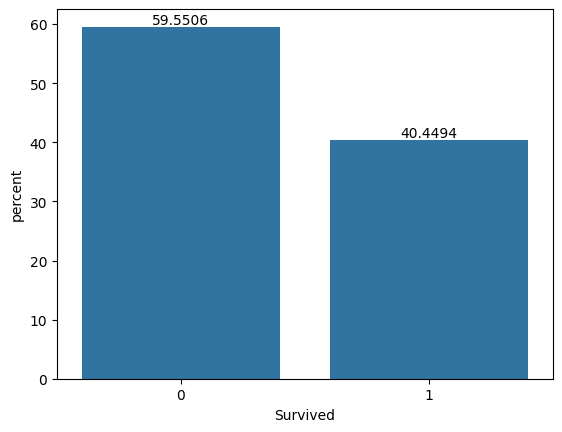

In [284]:
axis = sns.countplot(train_data2, x = "Survived", stat="percent")
axis.bar_label(axis.containers[0])
plt.show()

### Input and output for the cross-validation test

In [285]:
X = train_data2.drop(columns = ["Survived"])
Y = train_data2["Survived"]

### Random Forest

In [299]:
RF_score = apply_cv(X,Y,transformer1, RandomForestClassifier(n_estimators = 80, random_state=0))

print(RF_score)

0.7934994582881906


optimal number of features

In [287]:
""" 
rfecv = RFECV(
    estimator=RandomForestClassifier(n_estimators = 80, random_state=0),
    step=1,
    cv=5,
    scoring="accuracy",
    min_features_to_select=5,
    n_jobs=2,
)

rfecv.fit(X, Y) # Fix the issue of encoding variables, the modification must be seen in the X variable

print(f"Optimal number of features: {rfecv.n_features_}")
"""

' \nrfecv = RFECV(\n    estimator=RandomForestClassifier(n_estimators = 80, random_state=0),\n    step=1,\n    cv=5,\n    scoring="accuracy",\n    min_features_to_select=5,\n    n_jobs=2,\n)\n\nrfecv.fit(X, Y) # Fix the issue of encoding variables, the modification must be seen in the X variable\n\nprint(f"Optimal number of features: {rfecv.n_features_}")\n'

### K-neighbours

In [298]:
KNC_score = apply_cv(X,Y,transformer1, KNeighborsClassifier())

print(KNC_score)

0.748527528809219


### Logistic Regression

In [297]:
LR_score = apply_cv(X,Y,transformer1, LogisticRegression(random_state=0))

print(LR_score)

0.7864966019895598


### Linear Discriminant Analysis

In [296]:
LDA_score = apply_cv(X,Y,transformer2, LinearDiscriminantAnalysis())

print(LDA_score)

0.7850881512853344


### Gaussian Naive Bayes

In [294]:
GNB_score = apply_cv(X,Y,transformer2, GaussianNB())

print(GNB_score)

0.6108145375751011


### Support Vector Machine

In [295]:
SVC_score = apply_cv(X,Y,transformer1, SVC())

print(SVC_score)

0.7864966019895598


## Functions

### To apply cross_validation

In [293]:
def apply_cv(train_data, test_data, transformer, model):

    pipeline = make_pipeline(
        transformer,
        model
    )

    cv_score = cross_val_score(pipeline, X, Y, cv=5).mean() # It is using stratified k fold
    return cv_score